## Interactive plots
By using interactive plots we can explore the influence that changing different parameters has on an output.



As a simple example, we will plot

$$
f(t) = t^{\alpha} \sin(\omega t)
$$

where $\alpha$ and $\omega$ are parameters. 

We will create two sliders allowing us to change the value of $\alpha$ and $\omega$ and observe the change in $f(t)$

Interactive plots be can created using module `ipywidgets` module which we imported at the start of the notebook. 
>```Python
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")        
from ipywidgets import interact
```



We write the code to generate the plot as usual.

(To generate symbols α or ω type `\omega` or `\alpha`, pressing  `Tab` key at the end.)

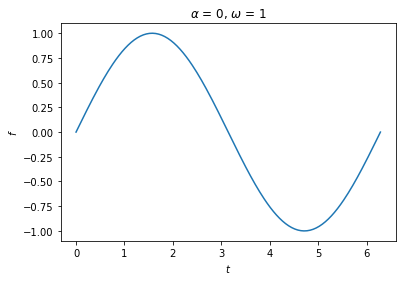

In [24]:
ω=1
α=0
t = np.linspace(0, 2*np.pi, 200)  

plt.plot(t, (t**α)*np.sin(ω*t))

plt.xlabel('$t$')
plt.ylabel('$f$')
plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))




We encasulate the code to generate the plot within a function.

The parameters we want to vary are given as function arguments.

In [25]:
def plot(ω=1, α=0):
    "A plot of the function f(t)= (t**α)*np.sin(ω*t)"
    t = np.linspace(0, 2*np.pi, 200)  
    
    plt.plot(t, (t**α)*np.sin(ω*t))
    
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    
    


The `interact` function, takes the following arguments:
- the plotting function 
- a tuple for each variable parameter:
 - maximum value (inclusive) 
 - minimum value (inclusive) 
 - step size between each possible value

In [26]:
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25));

A Jupyter Widget

You can now adjust the values by moving the sliders.

The new values appear as the title to the plot.

## Animated Plots

Plotting can be a very useful way to visualise what is happening in a dynamic physical system. 

Matplotlib can be used to create animated plots showing the change in a system over time.

We will use the `animation` and `rc` subpackages.  

>from matplotlib import animation, rc

We will also use a package to allow us to view the animated output within jupyter notebook.

>from IPython.display import HTML

These packages were imported at the start of this notebook.

Let's start with a simple example to learn how to build an animation.

We will then move onto an example of a physical model that you may study in one of your other subjects. 



The set of steps to build an animated plot is:
1. Create a figure window
1. Create axes within the window
1. Create object(s) to animate e.g. a line or point
1. Define an animation function for the change you want to see at each timestep
1. Use the function `animation.FuncAnimation` to create your animation and give it a name.
1. Call the animation name to play it.
1. (Save the animation)

Example: An animated sine wave. 

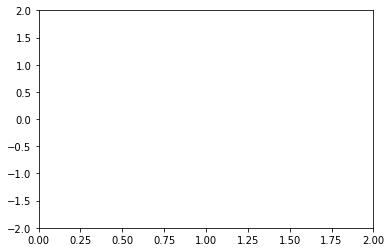

In [27]:
# 1. Create a figure window. 
fig = plt.figure()

# 2. Creates axes within the window
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))

# 3. Empty object (no data opints) to animate e.g. a line 
# Name must end with a `,` comma.  
line, = ax.plot([], [], lw=2)



In [28]:
# 4. Animation function: called sequentially
# i = frame number.
# Sine wave generated, phase shift proportional to i
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    # single return arguments should be given as a tuple with one value
    return (line,)
    


When returning a single argument (e.g. `line`) it is returned as a tuple with one value i.e. `(line, )`.

In [29]:
# 5. Animates the data; 100 frames, 20ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)

# Set the animation display format to html which the non-Python parts of this notebook are written in.
rc('animation', html='html5')

# 6. Play the animation 
anim

# 7. Save the animation as a .mp4 file
# 15 frames per second
# 1800 bits of data processed/stored per second
writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
anim.save('img/sin_movie.mp4', writer=writer)

### Simulating Physical Systems: Spring-Mass System
If you are studying an engineering-related subject, you will most likely study simple harmonic motion; a type of periodic motion or oscillation motion.

For this oscillation to happen, the restoring force is:
- directly proportional to the displacement
- in the direction opposite to the displacement.





A typical example of this is a mass attached to a spring.

<img src="img/spring_mass_system.gif" alt="Drawing" style="width: 500px;"/>



If we assume that:
 - the spring is ideal (it has no weight, mass, or damping losses)
 - there is no friction 
 
we can use a simple equation to give the position of the mass, $x$, as a function of time, $t$:

$x(t) = A cos(\omega t - \phi)$ 

where:
<br>$A$: Maximum amplitude (displacment from initial position), defined by the initial conditions of the system.
<br>$\phi$ : Phase (the initial angle of a sinusoidal function at its origin)
<br>$\omega$ : Angular frequency (frequency of oscillation expressed in radians)



Angular frequency

$\omega=2\pi f = \sqrt{\frac{k}{m}}$

where
<br>$k$ : spring constant
<br>$m$ : mass (kg)
<br>$f$ : frequency (Hz)

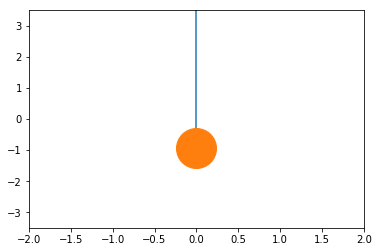

In [30]:
# 1. Create a figure window.
fig = plt.figure()

# 2. Create axes within the window
ax = plt.axes(xlim=(-2, 2), ylim=(-3.5,3.5))

# 3. Two objects to animate
line,   = ax.plot([2,1], [4,3], marker="" , ls="-")  # a line
point, = ax.plot([1], [1], marker='o', ms=40)        # a point

# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

# Position of mass as function of time
def fun(t):
    return A*np.sin(w * t + phi)

# 4. Animation function
def animate(i):    
    x = fun(i/10)     
    line.set_data([0,0], [4, -x])    
    point.set_data(0, -x)    
    return line, point
  
# 5. Create animation; 500 frames, 50ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=500, interval=50, blit=True)

# 6. Play animation
anim

# 7. Save animation
# writer = animation.writers['ffmpeg'](fps=15, bitrate=1800)
# anim.save('img/spring_movie.mp4', writer=writer)


### Review Exercise: Animated Plot - Projectile Trajectory

A projectile is launched with initial velocity $v$, at an angle of $\theta$.

If we neglect the force of drag on the projectile, it will travel in an arc. 

It's position in the horizontal (x) and vertical (y) direction at time $t$ can be found by.

$x= vt\cos(\theta)$
<br>$y= vt\sin(\theta) - \frac{1}{2}gt^2$

where gravity, $g=9.81$ms$^{-2}$ 

<img src="img/projectile2.png" alt="Drawing" style="width: 300px;"/>

In the cell below write a program to create an animation of the particle animate the motion of an ideal projectile when launched:
 - from an angle of $\theta = \pi/2$
 - with an initial velocity of $v=10$ms$^{-1}$ 
 
*Hint*
1. Create a figure window
1. Create axes within the figure window.
1. Create a point to animate
1. Create variables for $g$, $v$, and $\theta$
1. Write a function, `fun` to find x and y position as a function of time, t (function argument = t)
1. To animate the motion of the particle create a function, `animate`. Within animate call the function, `func`. Use a timestep of i/10.
1. Use the function `animation.FuncAnimation` to create the animation. Use 50 frames and an interval of 50ms between each frame.



In [ ]:
# Trajectory Plot

In [ ]:
# Example Solution

# Creates a figure window.
fig = plt.figure()

# Creates axes within the window
ax = plt.axes(xlim=(0, 10), ylim=(0, 5))

# Object to animate
point, = ax.plot([1], [1], marker='o', ms=40)  # for points

g = 9.81
v = 10
theta = np.pi/4

# Position of mass as function of time
def fun(t):
    x = v * t * np.cos(theta)
    y = v * t * np.sin(theta) - (0.5 * g * t**2)
    return x, y

def animate(i):   
    x, y = fun(i/10)   
    point.set_data(x, y)    
    return  (point,)
    
# Animates the data; 50 frames, 50ms delay between frames, blit=True : only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=50, interval=50, blit=True)

anim

# Summary

- Matplotlib can be used to produce a wide range of styles of figures and plots of your data.
- Simple line and scatter plots can be customised using a `formatstring`
- Additional features such as a figure legend and axis labels can be set as arguments when creating plots.
- We can "vectorise" other functions so that they accept data structure as arguments.
- Broasdcasting is a useful tool for applying information in one numpy array to another without having to repeat or reshape the arrays to match one another.  
- The matplotlib library can be used to quicky produce simple plots to visualise and check your solutions to mathematical problems.  
- This includes fitting a curve or a relationship to a dataset.